<a href="https://colab.research.google.com/github/MissSamyuktha/SpotifyWrapUp-Data-Analysis/blob/main/Spotify_WrapUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
!ls /content/drive/MyDrive/SpotifyWrapUpProject/spotify_history.csv

/content/drive/MyDrive/SpotifyWrapUpProject/spotify_history.csv


# ***Data Preprocessing ***
Data cleaning by dropping duplicates, filling missing values, formatting text by removing leading and trailing whitespaces, same uppercase, lowercase format, unique values.


In [141]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/SpotifyWrapUpProject/spotify_history.csv')

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [145]:
df['album_name'].nunique()

7948

In [146]:
df['artist_name'].nunique()

4113

In [147]:
df['track_name'].nunique()

13839

In [148]:
df.duplicated().sum()

1185

In [149]:
#drop duplicates
df.drop_duplicates(inplace = True)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148675 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  148675 non-null  object
 1   ts                 148675 non-null  object
 2   platform           148675 non-null  object
 3   ms_played          148675 non-null  int64 
 4   track_name         148675 non-null  object
 5   artist_name        148675 non-null  object
 6   album_name         148675 non-null  object
 7   reason_start       148532 non-null  object
 8   reason_end         148558 non-null  object
 9   shuffle            148675 non-null  bool  
 10  skipped            148675 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 11.6+ MB


In [151]:
#quick glance of rows with missing values
df1 = df[df.isna().any(axis=1)]
df1

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
577,0Cng3O0fIHllQx3S78RvmL,2015-08-12 02:26:11,iOS,283466,From Eden,Hozier,Hozier,NaN,trackdone,False,False
596,4VSg5K1hnbmIg4PwRdY6wV,2015-08-12 05:03:15,iOS,40681,Shades Of Cool,Lana Del Rey,Ultraviolence,trackdone,NaN,False,True
597,1NA2NvAgCB4EfcBC8OHfuj,2015-08-12 05:07:44,iOS,268173,Staying Up,The Neighbourhood,I Love You.,NaN,trackdone,False,False
605,2YuyaXVPEDnuO3cFuQ3BTW,2015-08-12 05:23:23,iOS,41145,El Karma,Noel Torres,La Balanza,trackdone,NaN,False,True
606,4YfMIrgiCbzo4td18hwwvA,2015-08-12 05:24:10,iOS,46997,Tentándome,Juan Magán,The King Is Back,NaN,endplay,False,True
...,...,...,...,...,...,...,...,...,...,...,...
10088,5cgL1YdlGWR5KfncpAGFQk,2017-01-06 19:14:00,iOS,253866,Custard Pie - 1990 Remaster,Led Zeppelin,Physical Graffiti,NaN,trackdone,False,False
11368,24NwBd5vZ2CK8VOQVnqdxr,2017-01-14 02:45:35,iOS,168344,Sweet Emotion,Aerosmith,Toys In The Attic,trackdone,NaN,True,True
11369,4wMR4fRKMTyUJG6VAsmccv,2017-01-14 02:45:58,iOS,0,Riot Van,Arctic Monkeys,"Whatever People Say I Am, That's What I'm Not",NaN,fwdbtn,False,True
24557,4gDyoe1FImDlXVt58ssnMf,2017-08-21 16:53:00,iOS,85495,All I Can Think About Is You,Coldplay,All I Can Think About Is You,NaN,NaN,False,True


In [152]:
#Filling missing values
df[['reason_start', 'reason_end']] = df[['reason_start', 'reason_end']].fillna('unknown')

In [153]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148675 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  148675 non-null  object
 1   ts                 148675 non-null  object
 2   platform           148675 non-null  object
 3   ms_played          148675 non-null  int64 
 4   track_name         148675 non-null  object
 5   artist_name        148675 non-null  object
 6   album_name         148675 non-null  object
 7   reason_start       148675 non-null  object
 8   reason_end         148675 non-null  object
 9   shuffle            148675 non-null  bool  
 10  skipped            148675 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 11.6+ MB


In [154]:
df['platform'].unique()

array(['web player', 'windows', 'android', 'iOS', 'cast to device', 'mac'],
      dtype=object)

In [155]:
df['reason_start'].unique()

array(['autoplay', 'clickrow', 'trackdone', 'nextbtn', 'backbtn',
       'unknown', 'popup', 'appload', 'fwdbtn', 'trackerror', 'remote',
       'endplay', 'playbtn'], dtype=object)

In [156]:
df['reason_end'].unique()

array(['clickrow', 'unknown', 'nextbtn', 'trackdone', 'backbtn', 'reload',
       'popup', 'endplay', 'fwdbtn', 'appload',
       'unexpected-exit-while-paused', 'unexpected-exit', 'logout',
       'remote', 'trackerror'], dtype=object)

In [157]:
#Cleaning up redunduncies and proper grouping
df[['reason_start', 'reason_end']] = df[['reason_start', 'reason_end']].replace('Unknown', 'unknown')

In [158]:
df

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


In [159]:
#Cleaning up extra whitespaces and formatting the text to standard title format
df['album_name'] = df['album_name'].str.strip().str.title()  # Remove whitespace Convert to title case
df['album_name'].nunique()

7907

In [160]:
df['artist_name'] = df['artist_name'].str.strip().str.title()  # Remove whitespace and convert to title case
df['artist_name'].nunique()

4112

In [161]:
df['track_name'] = df['track_name'].str.strip().str.title()  # Convert to title case
df['track_name'].nunique()

13665

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148675 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  148675 non-null  object
 1   ts                 148675 non-null  object
 2   platform           148675 non-null  object
 3   ms_played          148675 non-null  int64 
 4   track_name         148675 non-null  object
 5   artist_name        148675 non-null  object
 6   album_name         148675 non-null  object
 7   reason_start       148675 non-null  object
 8   reason_end         148675 non-null  object
 9   shuffle            148675 non-null  bool  
 10  skipped            148675 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 11.6+ MB


In [163]:
df[df.duplicated].count()


,0
spotify_track_uri,0
ts,0
platform,0
ms_played,0
track_name,0
artist_name,0
album_name,0
reason_start,0
reason_end,0
shuffle,0


# Analytics
# Drawing Insights From Spotify Over The Years
Questions to ask?

1. Most used platform for playing Spotify?
2. Most played track?
3. Famous artist?
4. Popular album?
5. Most skipped track?
6. Most shuffled track?
7. Preferred time to play music?
8. Month with highest playtime?
9. Year with highest playtime?
10. Popular day in a week to play music?

-->Trend over the years, months, days of a week







In [164]:
#Most used platform for playing Spotify
df.groupby('platform').count()

,spotify_track_uri,ts,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
platform,,,,,,,,,,
android,139562,139562,139562,139562,139562,139562,139562,139562,139562,139562
cast to device,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015
iOS,3049,3049,3049,3049,3049,3049,3049,3049,3049,3049
mac,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176
web player,182,182,182,182,182,182,182,182,182,182
windows,1691,1691,1691,1691,1691,1691,1691,1691,1691,1691


<Axes: title={'center': 'Platform choice while playing Spotify'}, ylabel='Platform'>

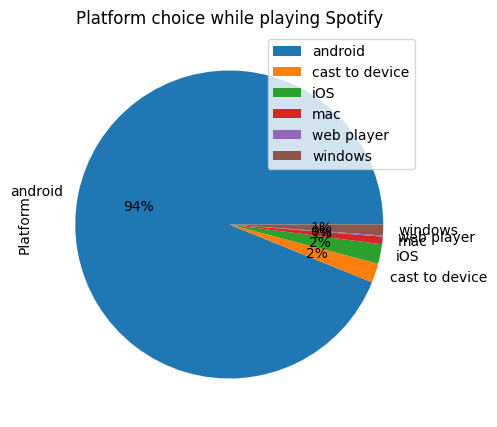

In [165]:
df.groupby('platform').count().plot(kind='pie', y='ts', autopct='%1.0f%%', figsize=(5, 5), title='Platform choice while playing Spotify', ylabel='Platform')

In [166]:
#Visualization in matplotlib
#plt.pie(df['platform'].value_counts(), labels=df['platform'].value_counts().index, autopct='%1.1f%%')

**Insights**:

Most used platform to play spotify track is *Android* with around 94% user base

Least used platform is *web player*

In [209]:
#Most common reason for start playing a track
df.groupby('reason_start').count().sort_values('ms_played', ascending=False).idxmax()

,0
spotify_track_uri,trackdone
ts,trackdone
platform,trackdone
ms_played,trackdone
track_name,trackdone
artist_name,trackdone
album_name,trackdone
reason_end,trackdone
shuffle,trackdone
skipped,trackdone


In [211]:
#Most Common Reason to Stop Playing a Track
df.groupby('reason_end').count().idxmax()

,0
spotify_track_uri,trackdone
ts,trackdone
platform,trackdone
ms_played,trackdone
track_name,trackdone
artist_name,trackdone
album_name,trackdone
reason_start,trackdone
shuffle,trackdone
skipped,trackdone


**Insights**

Main reason for both starting and ending the song track is "***trackdone"***

# Feature Engineering

**Creating new columns**

1. minutes_played is created by converting milliseconds into minutes for convenience.

2. Converted ts into datetime and extracted year, month, day_name and time_period information for drawing better insights.

3. Grouped the hours of a day into 4 groups namely morning, afternoon, evening, late night to better user user preferences.

In [169]:
#Creating a new column named minutes_played by converting ms_played into minutes
df['minutes_played'] = df['ms_played'] / 60000

In [170]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,minutes_played
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli'S,Waiting For The Dawn,autoplay,clickrow,False,False,0.053083
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking From The Bottle (Feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,1.031083
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,4.756433
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2.233700
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,0.000000


In [171]:
# Ensure the 'ts' column is in datetime format
df['ts'] = pd.to_datetime(df['ts'])

In [172]:
df['year'] = df['ts'].dt.year
df['month'] = df['ts'].dt.month
df['day'] = df['ts'].dt.day
df['day_of_week'] = df['ts'].dt.day_name()



In [173]:
# Extract the hour from the timestamp
df['hour'] = df['ts'].dt.hour

# Define a function to classify the hour
def classify_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Late Night'

# Apply the function to create a new column
df['time_period'] = df['hour'].apply(classify_time)

# Drop the 'hour' column and day column-no longer needed
df.drop(columns=['hour', 'day'], inplace=True)


In [212]:
#Most Played Track
df.groupby('track_name').count().sort_values('minutes_played', ascending=False).idxmax()

,0
spotify_track_uri,Ode To The Mets
ts,Ode To The Mets
platform,Ode To The Mets
ms_played,Ode To The Mets
artist_name,Ode To The Mets
album_name,Ode To The Mets
reason_start,Ode To The Mets
reason_end,Ode To The Mets
shuffle,Ode To The Mets
skipped,Ode To The Mets


**Insights**

Most popular track is ***"Ode To The Mets"***

In [213]:
#Famous Artist
df.groupby('artist_name').count().sort_values('minutes_played', ascending=False).idxmax()

,0
spotify_track_uri,The Beatles
ts,The Beatles
platform,The Beatles
ms_played,The Beatles
track_name,The Beatles
album_name,The Beatles
reason_start,The Beatles
reason_end,The Beatles
shuffle,The Beatles
skipped,The Beatles


**Insights**

Most popular artist is "**The Beatles**"

Top 5 popular artists include The Beatles, The Killers, John Mayer, Bob Dylan, Paul Mccartney.

In [214]:
#Popular Album
df.groupby('album_name').count().sort_values('minutes_played', ascending=False).idxmax()

,0
spotify_track_uri,The Beatles
ts,The Beatles
platform,The Beatles
ms_played,The Beatles
track_name,The Beatles
artist_name,The Beatles
reason_start,The Beatles
reason_end,The Beatles
shuffle,The Beatles
skipped,The Beatles


**Insights**

Most played album is ** The Beatles**.

Top 5 contains The Beatles, Past Masters, Abbey Road, The Wall, Revolver.

In [177]:
#Alternate way of finding most played track_name

#df.groupby('track_name').size().sort_values(ascending=False)


In [178]:
#Month with highest playtime
df.groupby('month').count().sort_values('minutes_played', ascending=False)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,minutes_played,year,day_of_week,time_period
month,,,,,,,,,,,,,,,
9,17712,17712,17712,17712,17712,17712,17712,17712,17712,17712,17712,17712,17712,17712,17712
10,16223,16223,16223,16223,16223,16223,16223,16223,16223,16223,16223,16223,16223,16223,16223
8,15733,15733,15733,15733,15733,15733,15733,15733,15733,15733,15733,15733,15733,15733,15733
11,13216,13216,13216,13216,13216,13216,13216,13216,13216,13216,13216,13216,13216,13216,13216
1,12524,12524,12524,12524,12524,12524,12524,12524,12524,12524,12524,12524,12524,12524,12524
12,11832,11832,11832,11832,11832,11832,11832,11832,11832,11832,11832,11832,11832,11832,11832
4,11828,11828,11828,11828,11828,11828,11828,11828,11828,11828,11828,11828,11828,11828,11828
7,11608,11608,11608,11608,11608,11608,11608,11608,11608,11608,11608,11608,11608,11608,11608
6,10519,10519,10519,10519,10519,10519,10519,10519,10519,10519,10519,10519,10519,10519,10519


**Insights**

People tend to like music more in ***Fall season*** with *September* being the top and *october* stands next to it.

In [179]:
#Popular Day in a Week to Play Music
df.groupby('day_of_week').count().sort_values('minutes_played', ascending=False)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,minutes_played,year,month,time_period
day_of_week,,,,,,,,,,,,,,,
Friday,25467,25467,25467,25467,25467,25467,25467,25467,25467,25467,25467,25467,25467,25467,25467
Wednesday,23241,23241,23241,23241,23241,23241,23241,23241,23241,23241,23241,23241,23241,23241,23241
Thursday,21134,21134,21134,21134,21134,21134,21134,21134,21134,21134,21134,21134,21134,21134,21134
Monday,20827,20827,20827,20827,20827,20827,20827,20827,20827,20827,20827,20827,20827,20827,20827
Tuesday,20457,20457,20457,20457,20457,20457,20457,20457,20457,20457,20457,20457,20457,20457,20457
Saturday,19364,19364,19364,19364,19364,19364,19364,19364,19364,19364,19364,19364,19364,19364,19364
Sunday,18185,18185,18185,18185,18185,18185,18185,18185,18185,18185,18185,18185,18185,18185,18185


In [180]:
#Preferred Time to Play Music
df[df['day_of_week'] == 'Friday'].groupby('time_period').count().sort_values('minutes_played', ascending=False)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,minutes_played,year,month,day_of_week
time_period,,,,,,,,,,,,,,,
Late Night,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305
Evening,7342,7342,7342,7342,7342,7342,7342,7342,7342,7342,7342,7342,7342,7342,7342
Morning,3992,3992,3992,3992,3992,3992,3992,3992,3992,3992,3992,3992,3992,3992,3992
Afternoon,2828,2828,2828,2828,2828,2828,2828,2828,2828,2828,2828,2828,2828,2828,2828


In [181]:
#Preferred time of day to play music
df.groupby('time_period').count().sort_values('minutes_played', ascending=False)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,minutes_played,year,month,day_of_week
time_period,,,,,,,,,,,,,,,
Late Night,72060,72060,72060,72060,72060,72060,72060,72060,72060,72060,72060,72060,72060,72060,72060
Evening,36313,36313,36313,36313,36313,36313,36313,36313,36313,36313,36313,36313,36313,36313,36313
Morning,25020,25020,25020,25020,25020,25020,25020,25020,25020,25020,25020,25020,25020,25020,25020
Afternoon,15282,15282,15282,15282,15282,15282,15282,15282,15282,15282,15282,15282,15282,15282,15282


**Insights**

**Friday nights** are the indeed musical nights with highest play time recorded on end of work week - Late Nights of Friday.

Also, in general people prefer to listen music on **late nights** post 9 pm.

In [182]:
#Year With Highest Playtime
df.groupby('year').count().sort_values('minutes_played', ascending=False)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,minutes_played,month,day_of_week,time_period
year,,,,,,,,,,,,,,,
2017,26111,26111,26111,26111,26111,26111,26111,26111,26111,26111,26111,26111,26111,26111,26111
2020,23345,23345,23345,23345,23345,23345,23345,23345,23345,23345,23345,23345,23345,23345,23345
2021,22980,22980,22980,22980,22980,22980,22980,22980,22980,22980,22980,22980,22980,22980,22980
2022,16189,16189,16189,16189,16189,16189,16189,16189,16189,16189,16189,16189,16189,16189,16189
2019,14926,14926,14926,14926,14926,14926,14926,14926,14926,14926,14926,14926,14926,14926,14926
2018,14812,14812,14812,14812,14812,14812,14812,14812,14812,14812,14812,14812,14812,14812,14812
2023,11023,11023,11023,11023,11023,11023,11023,11023,11023,11023,11023,11023,11023,11023,11023
2024,9870,9870,9870,9870,9870,9870,9870,9870,9870,9870,9870,9870,9870,9870,9870
2016,6403,6403,6403,6403,6403,6403,6403,6403,6403,6403,6403,6403,6403,6403,6403


**Insights**

Year with most music runtine
1. 2017 stands top
2. Just next to it is infamous 2020 with most lockdowns.

In [183]:
#Most Skipped Track
# Group by 'track_name' and sum the boolean column to count 'True' values
df.groupby('track_name')['skipped'].sum().sort_values(ascending=False)

,skipped
track_name,
Paraíso,29
Photograph,22
Superheroes,21
Switzerland,20
What Do You Mean?,20
...,...
I Never Cared For You,0
I Never Wanna Be Like You,0
I Never Wanted,0


In [184]:
df['track_name'][df['skipped'] == True].value_counts()

,count
track_name,
Paraíso,29
Photograph,22
Superheroes,21
Switzerland,20
What Do You Mean?,20
...,...
My Mind Is Ramblin,1
Violet Hill,1
Dizzy Miss Lizzy - Remastered 2009,1


In [185]:
#Most shuffled track
df['track_name'][df['shuffle'] == True].value_counts()

,count
track_name,
In The Blood,124
Ode To The Mets,114
Bennie And The Jets - Remastered 2014,102
Reminder,101
19 Dias Y 500 Noches - En Directo,101
...,...
Wasted,1
Like Home - Radio Mix,1
Sovereign Light Café - Afrojack Remix,1


**Insights**

Most skipped track on spotify is **"Paraíso"**.

Most shuffled track on spotify is **"In The Blood"**.

# Trend over the years, months, days of week and preferred time of day

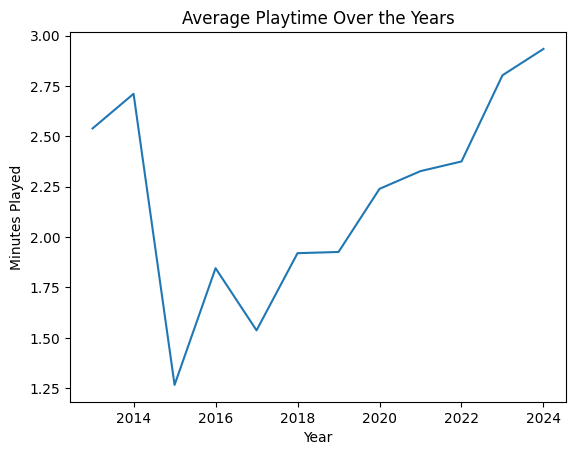

In [186]:
#Average, min, max playtime in a day, month, year
df.groupby('year').agg({'minutes_played': ['mean', 'min', 'max']})
#trend over the years
df.groupby('year').agg({'minutes_played': ['mean']}).plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Minutes Played')
plt.title('Average Playtime Over the Years')
plt.legend().remove()
plt.show()

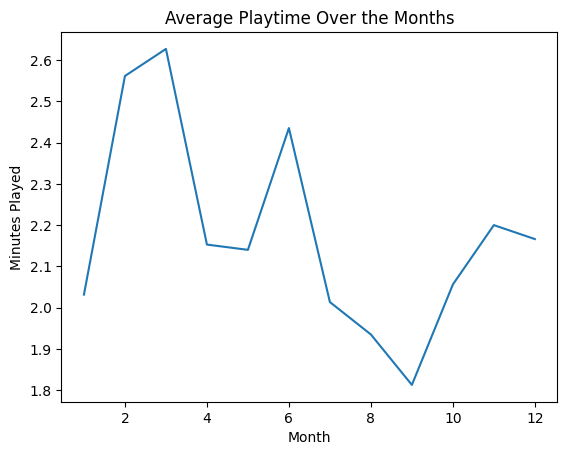

In [187]:
#Average Playtime Over the Months
df.groupby('month').agg({'minutes_played': ['mean', 'min', 'max']})
#trend over the months
#Plotting
df.groupby('month').agg({'minutes_played': ['mean']}).plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Minutes Played')
plt.title('Average Playtime Over the Months')
plt.legend().remove()
plt.show()

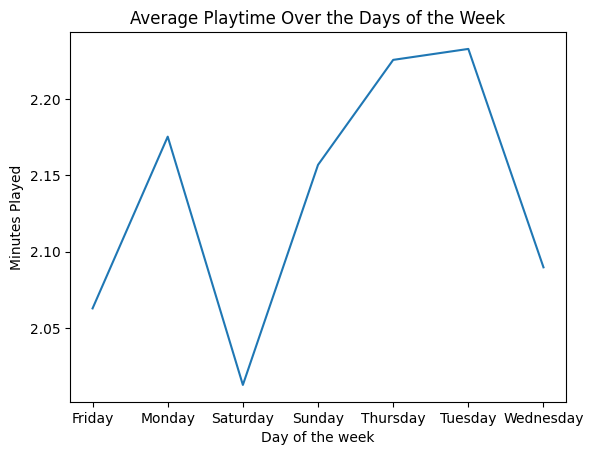

In [188]:
#Average Playtime over the Days of the Week
df.groupby('day_of_week').agg({'minutes_played': ['mean', 'min', 'max']})
#Plotting the trend
df.groupby('day_of_week').agg({'minutes_played': ['mean']}).plot(kind='line')
plt.xlabel('Day of the week')
plt.ylabel('Minutes Played')
plt.title('Average Playtime Over the Days of the Week')
plt.legend().remove()
plt.show()

In [189]:
#df.groupby(['time_period', 'year']).count().sort_values('minutes_played',ascending=False)

**Insights**

Favourite play time over the years can be better understood with below visualisation - *Late Night* being the preferred choice *consistently* over the years.

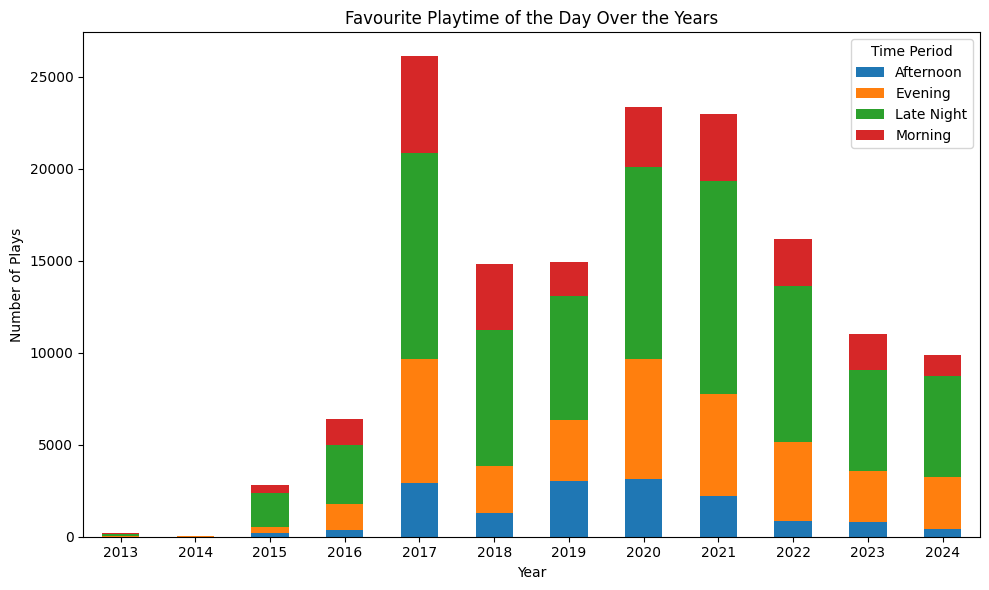

In [190]:
#Favourite playtime over the years
# Group data by year and time period, then count occurrences
#Plotting
df.groupby(['year', 'time_period']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6), title='Favourite Playtime of the Day Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Time Period')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Insights from Spotify 2013-2024

1. Most used platform for playing Spotify is **"Android"**

2. Most played track is **"Ode To The Mets"**

3. Famous artist is **"The Beatles"**

4. Popular album is **"The Beatles"**

5. Most skipped track are **"Paraíso"**

6. Most shuffled track is **"In The Blood"**

7. Most common reason to start playing a track is **"trackdone"**.

8. Most common reason to stop playing a track is **"trackdone"**.

9. Popular day in a week to play music is **"Friday"**
10. Preferred time to play music in a day is **"Late Night"**

    **"Friday Nights"** are the most musical nights over the years.

11. People tend to like music more in **"Fall season"** with "**September**" and October in Top 2.

12. Year with most music runtine is **"2017"**. Just next to it is lockdown year 2020.

--> **Trend** over the months, days of a week shown through matplot **Visualisations**.


# 2024 Spotify WrapUp

In [191]:
#2024 highlights
#Creating a temporary dataset for the year 2024
df_2024 = df[df['year'] == 2024]
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9870 entries, 139990 to 149859
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   spotify_track_uri  9870 non-null   object        
 1   ts                 9870 non-null   datetime64[ns]
 2   platform           9870 non-null   object        
 3   ms_played          9870 non-null   int64         
 4   track_name         9870 non-null   object        
 5   artist_name        9870 non-null   object        
 6   album_name         9870 non-null   object        
 7   reason_start       9870 non-null   object        
 8   reason_end         9870 non-null   object        
 9   shuffle            9870 non-null   bool          
 10  skipped            9870 non-null   bool          
 11  minutes_played     9870 non-null   float64       
 12  year               9870 non-null   int32         
 13  month              9870 non-null   int32         
 14  day_of

# Analytics

# Drawing Insights from 2024

Questions to ask?

1. Most used platform for playing Spotify?
2. Most played track in 2024?
3. Famous artist in 2024?
4. Popular album in 2024?
5. Most skipped track?
6. Most shuffled track?
7. Most common reason for starting a track?
8. Most common reason for ending a track?
9. Preferred time to play music in a day?
10. Month with highest playtime?
11. Popular day in a week to play music?
12. Trend over the months, days of a week

In [192]:
#1.Most used platform to play Spotify in 2024
df_2024['platform'].value_counts()

,count
platform,
android,9480
mac,390


In [193]:
#2.Most played track in 2024
df_2024.groupby('track_name').count().sort_values('minutes_played', ascending=False)

,spotify_track_uri,ts,platform,ms_played,artist_name,album_name,reason_start,reason_end,shuffle,skipped,minutes_played,year,month,day_of_week,time_period
track_name,,,,,,,,,,,,,,,
Why Did It Have To Be Me?,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
Superdeli,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
"Knowing Me, Knowing You",26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
Does Your Mother Know,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
Dancing Queen,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gotta Be Somebody,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Rah Tah Tah,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Graduation Day,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [194]:
#3.Famous artist in 2024
df_2024.groupby('artist_name').count().sort_values('minutes_played', ascending=False)

,spotify_track_uri,ts,platform,ms_played,track_name,album_name,reason_start,reason_end,shuffle,skipped,minutes_played,year,month,day_of_week,time_period
artist_name,,,,,,,,,,,,,,,
The Beatles,511,511,511,511,511,511,511,511,511,511,511,511,511,511,511
John Mayer,439,439,439,439,439,439,439,439,439,439,439,439,439,439,439
The Killers,423,423,423,423,423,423,423,423,423,423,423,423,423,423,423
Abba,302,302,302,302,302,302,302,302,302,302,302,302,302,302,302
Paul Mccartney,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lian Ross,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
León Larregui,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Les Sales Gosses,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [195]:
#4.Popular album in 2024
df_2024.groupby('album_name').count().sort_values('minutes_played', ascending=False)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,reason_start,reason_end,shuffle,skipped,minutes_played,year,month,day_of_week,time_period
album_name,,,,,,,,,,,,,,,
Arrival,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119
Past Masters,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
The Beatles,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79
Born And Raised,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76
Paradise Valley,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Have Yourself A Merry Little Christmas,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Couch,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Mocedades 5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [196]:
#5.Most skipped track in 2024
df_2024['track_name'][df_2024['skipped'] == True].value_counts()

,count
track_name,
Why Did It Have To Be Me?,7
Fernando,7
Espresso,5
La Flor De La Canela (With Joaquín Sabina),5
The Continuing Story Of Bungalow Bill - Remastered 2009,5
...,...
Suzette,1
Nature Boy,1
La Javanaise,1


In [197]:
#6.Most shuffled track in 2024
df_2024['track_name'][df_2024['shuffle'] == True].value_counts()

,count
track_name,
Why Did It Have To Be Me?,26
I Guess I Just Feel Like,19
Superdeli,18
9 To 5,17
Jambalaya (On The Bayou),16
...,...
One After 909 - Remastered 2009,1
Because - Remastered 2009,1
Royals,1


In [216]:
#Most common reason to start playing a track in 2024
df_2024['reason_end'].value_counts().idxmax()

'trackdone'

In [218]:
#Most common reason to stop playing a track in 2024
df_2024['reason_end'].value_counts().idxmax()

'trackdone'

In [219]:
#Popular day in a week to play music
df_2024.groupby('day_of_week').count().sort_values('minutes_played', ascending=False).idxmax()

,0
spotify_track_uri,Friday
ts,Friday
platform,Friday
ms_played,Friday
track_name,Friday
artist_name,Friday
album_name,Friday
reason_start,Friday
reason_end,Friday
shuffle,Friday


In [199]:
#Preferred time to play music in a day
df_2024.groupby('time_period').count().sort_values('minutes_played', ascending=False)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,minutes_played,year,month,day_of_week
time_period,,,,,,,,,,,,,,,
Late Night,5472,5472,5472,5472,5472,5472,5472,5472,5472,5472,5472,5472,5472,5472,5472
Evening,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803
Morning,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149
Afternoon,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446


In [200]:
#Month with highest playtime in 2024
df_2024.groupby('month').count().sort_values('minutes_played', ascending=False)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,minutes_played,year,day_of_week,time_period
month,,,,,,,,,,,,,,,
1,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449
11,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425
10,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300
9,962,962,962,962,962,962,962,962,962,962,962,962,962,962,962
8,932,932,932,932,932,932,932,932,932,932,932,932,932,932,932
2,924,924,924,924,924,924,924,924,924,924,924,924,924,924,924
3,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700
4,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619
5,569,569,569,569,569,569,569,569,569,569,569,569,569,569,569


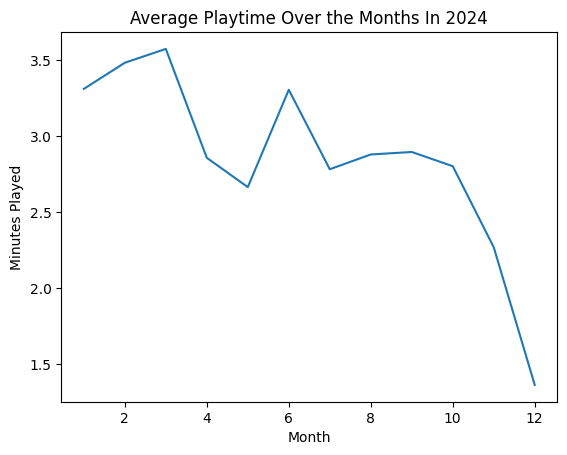

In [201]:
#Trend over the months in 2024
df_2024.groupby('month').agg({'minutes_played': ['mean', 'min', 'max']})
#Plotting
df_2024.groupby('month').agg({'minutes_played': ['mean']}).plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Minutes Played')
plt.title('Average Playtime Over the Months In 2024')
plt.legend().remove()
plt.show()

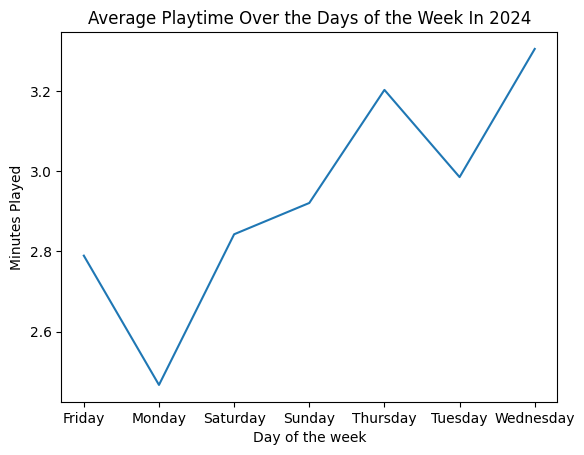

In [202]:
#Trend over the days of the week in 2024
df_2024.groupby('day_of_week').agg({'minutes_played': ['mean', 'min', 'max']})
#Plotting
df_2024.groupby('day_of_week').agg({'minutes_played': ['mean']}).plot(kind='line')
plt.xlabel('Day of the week')
plt.ylabel('Minutes Played')
plt.title('Average Playtime Over the Days of the Week In 2024')
plt.legend().remove()
plt.show()

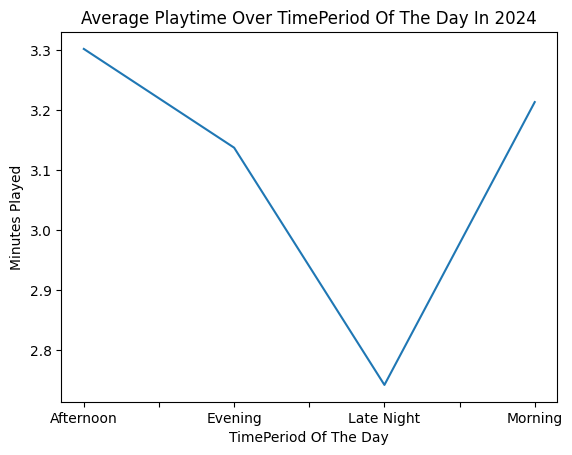

In [203]:
#Trend over timeperiod of the day in 2024
df_2024.groupby('time_period').agg({'minutes_played': ['mean', 'min', 'max']})
#Plotting
df_2024.groupby('time_period').agg({'minutes_played': ['mean']}).plot(kind='line')
plt.xlabel('TimePeriod Of The Day')
plt.ylabel('Minutes Played')
plt.title('Average Playtime Over TimePeriod Of The Day In 2024')
plt.legend().remove()
plt.show()

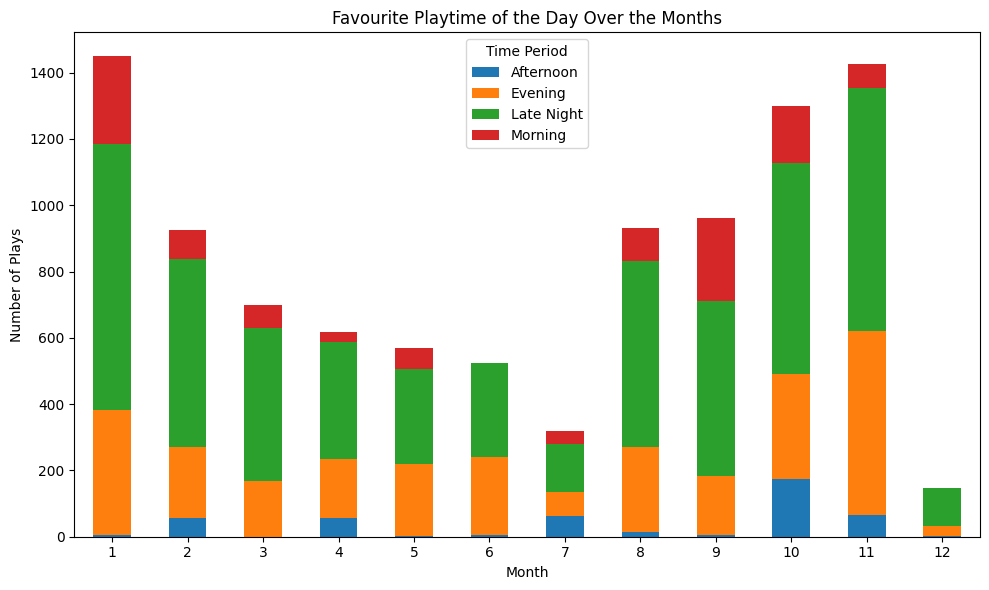

In [204]:
#Favourite playtime over the months
# Group data by month and time period, then count occurrences
#Plotting
df_2024.groupby(['month', 'time_period']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6), title='Favourite Playtime of the Day Over the Months')
plt.xlabel('Month')
plt.ylabel('Number of Plays')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Time Period')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

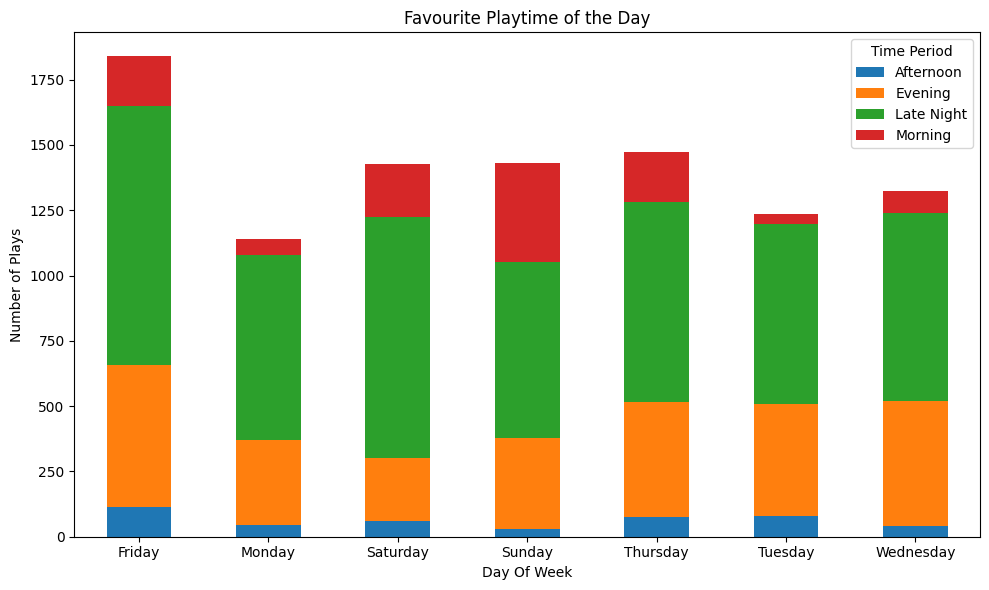

In [205]:
#Favourite playtime over the days of a week
# Group data by day of week and time period, then count occurrences
#Plotting
df_2024.groupby(['day_of_week', 'time_period']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Favourite Playtime of the Day')
plt.xlabel('Day Of Week')
plt.ylabel('Number of Plays')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Time Period')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Insights from 2024

1. Most used platform for playing Spotify is **"Android"**

2. Most played track in 2024 is **"Why Did It Have To Be Me?"**

3. Famous artist in 2024 is **"The Beatles"**

4. Popular album in 2024 is **"Arrival"**

5. Most skipped track are **"Why Did It Have To Be Me?"** and **"Fernando"**

6. Most shuffled track is **"Why Did It Have To Be Me?"**

7. Most common reason to start playing a track is **"trackdone"**.

8. Most common reason to stop playing a track is **"trackdone"**.

9. Popular day in a week to play music is **"Friday"**
10. Preferred time to play music in a day is **"Late Night"**

    **"Friday Nights"** are the most musical nights over the years.

11. Month with highest playtime is **"January"**. **"Fall season"** stands next with *Nov, Oct* has next highest playtime.

12. Trend over the months, days of a week shown through matplot **Visualisations**.
